# Data Cleaning on Online Sales Data

The [dataset](https://www.kaggle.com/datasets/arnavsmayan/online-retail-sales-dataset) will provide synthetic data for online retail sales, which include details of customer transactions and orders with regard to the involved items, their quantities, prices, discounts, methods of payment, and the customers' demographics for analysis in terms of buying behavior, sales trend, inventory management, and marketing strategy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
import statsmodels.api as sm
from scipy.stats import shapiro, normaltest, levene, zscore, boxcox, stats
import statsmodels.api as sm

In [2]:
# Set visual display settings
sns.set(style='whitegrid')

## Load CSV

In [3]:
original_df = pd.read_csv('online_retail_sales_dataset.csv')

In [4]:
# Vars

# specify numeric columns
numeric_columns = original_df.select_dtypes(include=['int64', 'float64']).columns

# specify columns to eliminate
columns_to_exclude = ['transaction_id', 'customer_id', 'product_id']

# columns for usual numeric process
cols_to_process = ['quantity', 'price', 'discount', 'customer_age', 'total_amount']

# filter out the specified numeric columns
filtered_numeric_columns = [col for col in numeric_columns if col not in columns_to_exclude]

# DF of numeric columns to process
filtered_numeric_df = original_df[filtered_numeric_columns]

In [5]:
original_df.head()

,transaction_id,timestamp,customer_id,product_id,product_category,quantity,price,discount,payment_method,customer_age,customer_gender,customer_location,total_amount
0,1,2023-01-01 00:00:00,1993,915,Home & Kitchen,8,103.30,0.23,Gift Card,27,Female,North America,636.33
1,2,2023-01-01 00:01:00,3474,553,Clothing,9,180.28,0.31,Gift Card,53,Other,South America,1119.54
2,3,2023-01-01 00:02:00,4564,248,Beauty & Personal Care,7,81.58,0.27,Debit Card,34,Other,North America,416.87
3,4,2023-01-01 00:03:00,1133,948,Clothing,3,235.20,0.00,Debit Card,50,Other,Australia,705.60
4,5,2023-01-01 00:04:00,3626,284,Books,9,453.00,0.34,Credit Card,23,Female,Australia,2690.82


## DF Overview

In [6]:
# Check datatypes of the column 
original_df.info()
# there are 8 numeric & 5 non-numeric cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   transaction_id     1000000 non-null  int64  
 1   timestamp          1000000 non-null  object 
 2   customer_id        1000000 non-null  int64  
 3   product_id         1000000 non-null  int64  
 4   product_category   1000000 non-null  object 
 5   quantity           1000000 non-null  int64  
 6   price              1000000 non-null  float64
 7   discount           1000000 non-null  float64
 8   payment_method     1000000 non-null  object 
 9   customer_age       1000000 non-null  int64  
 10  customer_gender    1000000 non-null  object 
 11  customer_location  1000000 non-null  object 
 12  total_amount       1000000 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 99.2+ MB


In [7]:
original_df.shape
# (rows, columns)

(1000000, 13)

### Descriptive Statistics

In [8]:
# Descriptive stat of selected numeric columns
original_df[['quantity', 'price', 'discount', 
         'customer_age', 'total_amount']].describe()

,quantity,price,discount,customer_age,total_amount
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,5.003086,252.445705,0.250204,43.508625,946.839858
std,2.581004,142.868633,0.144384,15.007346,810.902205
min,1.000000,5.000000,0.000000,18.000000,2.560000
25%,3.000000,128.690000,0.130000,31.000000,297.180000
50%,5.000000,252.700000,0.250000,44.000000,715.710000
75%,7.000000,375.990000,0.380000,57.000000,1397.750000
max,9.000000,500.000000,0.500000,69.000000,4496.130000


## Data Cleaning


[Explicitly defining data types for your columns ensures consistency, prevents implicit conversions, enhances performance, and avoids errors during analysis](https://www.geeksforgeeks.org/explicitly-define-datatype-in-a-python-function/.). This practice is crucial for large datasets or collaborative work. However, if you're confident in your data's structure or only conducting exploratory analysis, explicit type definitions may not be necessary.

### Standardizing Format: Type Conversion
**Type Conversion Applied To All Columns**: `transaction_id', 'timestamp', 'customer_id', 'product_id', 'product_category', 'quantity', 'price', 'discount', 'payment_method', 'customer_age', 'customer_gender', 'customer_location', 'total_amount'`

**Strategy/Action Taken**: In our aim to standardize formats within the dataset, specific type conversions were executed to maintain consistency across pertinent columns. For example, the price column was transformed into the float64 data type using the command `original_df['price'] = original_df['price'].astype('float64')`. Likewise, the customer_location column was converted to a string data type with `original_df['customer_location'] = original_df['customer_location'].astype(str)`, and the quantity column was cast to the int64 type through `original_df['quantity'] = original_df['quantity'].astype('int64')`.

While utilizing `df.info()` to examine data types is a useful initial step in recognizing the data types present in the DataFrame, it does not ensure that all entries are accurately formatted or suitable for analysis. For instance, a column identified as int64 by df.info() may still include non-integer entries or NaN values that could hinder analytical processes. Therefore, explicit type conversion is essential to confirm data integrity and usability.

 

**Rationale**: Maintaining consistent data types mitigates errors during analysis by ensuring that operations conducted on the data are valid. For instance, performing numerical operations on a column containing string data would lead to errors, while calculations dependent on specific data types could produce incorrect results if formats are inconsistent. By executing these type conversions, potential risks associated with data analysis—such as runtime errors, misinterpretations, and inaccurate modeling outcomes—are significantly diminished. This proactive strategy not only protects data quality but also improves the overall reliability of the insights obtained from subsequent analyses. Standardization is particularly crucial when integrating multiple datasets, as varying formats can result in significant challenges during merging or joining operations.

Converting `categorical columns to lowercase` during data cleaning is crucial for ensuring consistency, improving data quality, enhancing processing performance, and facilitating compatibility with analytical tools. By standardizing entries to the same format, it eliminates discrepancies from variations in capitalization, which aids in accurate data aggregation and analysis. Additionally, lowercasing reduces the likelihood of errors during data processing—particularly in operations like grouping or merging—by preventing missed matches or duplicates. It also improves the efficiency of string operations in data processing frameworks, especially with large datasets. Finally, this conversion ensures that machine learning algorithms can effectively encode and analyze categorical data, as many require consistent formats for accurate recognition and transformation.

In [9]:
# Type conversion
original_df['customer_id'] = original_df['customer_id'].astype('int64')  # Ensure customer_id is integer type
original_df['transaction_id'] = original_df['transaction_id'].astype('int64') 
original_df['product_id'] = original_df['product_id'].astype('int64') 

original_df['quantity'] = original_df['quantity'].astype('int64')
original_df['price'] = original_df['price'].astype('float64') 
original_df['discount'] = original_df['discount'].astype('float64')  
original_df['customer_age'] = original_df['customer_age'].astype('int64')
original_df['total_amount'] = original_df['total_amount'].astype('float64')

original_df['timestamp'] = original_df['timestamp'].astype(str)  
original_df['product_category'] = original_df['product_category'].astype(str)  
original_df['payment_method'] = original_df['payment_method'].astype(str)  
original_df['customer_gender'] = original_df['customer_gender'].astype(str)  
original_df['customer_location'] = original_df['customer_location'].astype(str)

In [10]:
original_df.columns

Index(['transaction_id', 'timestamp', 'customer_id', 'product_id',
       'product_category', 'quantity', 'price', 'discount', 'payment_method',
       'customer_age', 'customer_gender', 'customer_location', 'total_amount'],
      dtype='object')

In [11]:


### Standardizing categorical variables to lower case

original_df['payment_method'] = original_df['payment_method'].str.lower()
original_df['customer_location'] = original_df['customer_location'].str.lower()
original_df['product_category'] = original_df['product_category'].str.lower()
original_df['customer_gender'] = original_df['customer_gender'].str.lower()


In [12]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   transaction_id     1000000 non-null  int64  
 1   timestamp          1000000 non-null  object 
 2   customer_id        1000000 non-null  int64  
 3   product_id         1000000 non-null  int64  
 4   product_category   1000000 non-null  object 
 5   quantity           1000000 non-null  int64  
 6   price              1000000 non-null  float64
 7   discount           1000000 non-null  float64
 8   payment_method     1000000 non-null  object 
 9   customer_age       1000000 non-null  int64  
 10  customer_gender    1000000 non-null  object 
 11  customer_location  1000000 non-null  object 
 12  total_amount       1000000 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 99.2+ MB


### Standardizing Format: Timestamp

[In the Philippines, the recommended timestamp format conforms to the ISO 8601 standard](https://en.wikipedia.org/wiki/Date_and_time_notation_in_the_Philippines#:~:text=Date%20and%20time%20notation%20in%20the%20Philippines%20varies%20across%20the%20country%20in%20various%2C%20customary%20formats.%20Some%20government%20agencies%20in%20the%20Philippines%20have%20adopted,Multi%2DPurpose%20ID.), which prescribes the format as `YYYY-MM-DD` for dates and utilizes the 24-hour clock format for times, resulting in a complete representation such as 2023-01-01T00:02:00. This standardization enhances clarity and mitigates ambiguity in datetime notation, making it appropriate for legal and technical applications.

**StrategyAction Taken**: To convert a `timestamp` in the format "YYYY-MM-DD HH:MM:SS" to ISO 8601 format "YYYY-MM-DD" in Python, we utilized the `datetime` module's `strptime` and `strftime` methods.

**Rationale**: Correct data types minimize the risk of errors during computations and support the correct functioning of analysis functions.

In [13]:
# ISO 8601 utilizes the 24-hour clock format for times
original_df['timestamp'] = pd.to_datetime(original_df['timestamp']).apply(lambda x: x.isoformat())
# ISO 8601 with date  only
original_df['date'] = pd.to_datetime(original_df['timestamp']).dt.date

In [14]:
original_df.shape

(1000000, 14)

### Handling Missisng Values

In [15]:
# identify columns with missing values
original_df.isnull().sum()
# DF has no NAN

transaction_id       0
timestamp            0
customer_id          0
product_id           0
product_category     0
quantity             0
price                0
discount             0
payment_method       0
customer_age         0
customer_gender      0
customer_location    0
total_amount         0
date                 0
dtype: int64

**Suggestions if missing values are present**

For numeric column:

`df['col'] = df['col'].fillna(0)`

Option to fill missing values in a specific column with the mean:

`df['price'].fillna(df['price'].mean(), inplace=True)`
For non-numeric columns replace with appropriate string:

`df['col'] = df['col'].fillna('blah!')`

Option to fill missing values in a specific column with the mean:

`df['price'].fillna(df['price'].mean(), inplace=True)`

**Rationale**: Handling missing values ensures comprehensive datasets, reducing biases during analysis. This practice allows for better data integrity and improved predictive performance.

### Handling Duplicate Rows

<b>Suggestion if there are duplicate rows</b>

Remove duplicate rows
```python
original_df = original_df.drop_duplicates()
```

**Rationale**: By eliminating duplicates, data clarity is enhanced, allowing for more accurate insights from analyses.

In [16]:
# remove duplicate rows
original_df = original_df.drop_duplicates()
# Rationale: By eliminating duplicates, data clarity is enhanced, allowing for more accurate insights from analyses.

In [17]:
# DF has no duplicate rows
original_df.shape

(1000000, 14)

In [18]:
# check for duplicate rows
original_df.duplicated().sum()
# DF has no duplicate rows

np.int64(0)

### Visualizing the Data Distribution

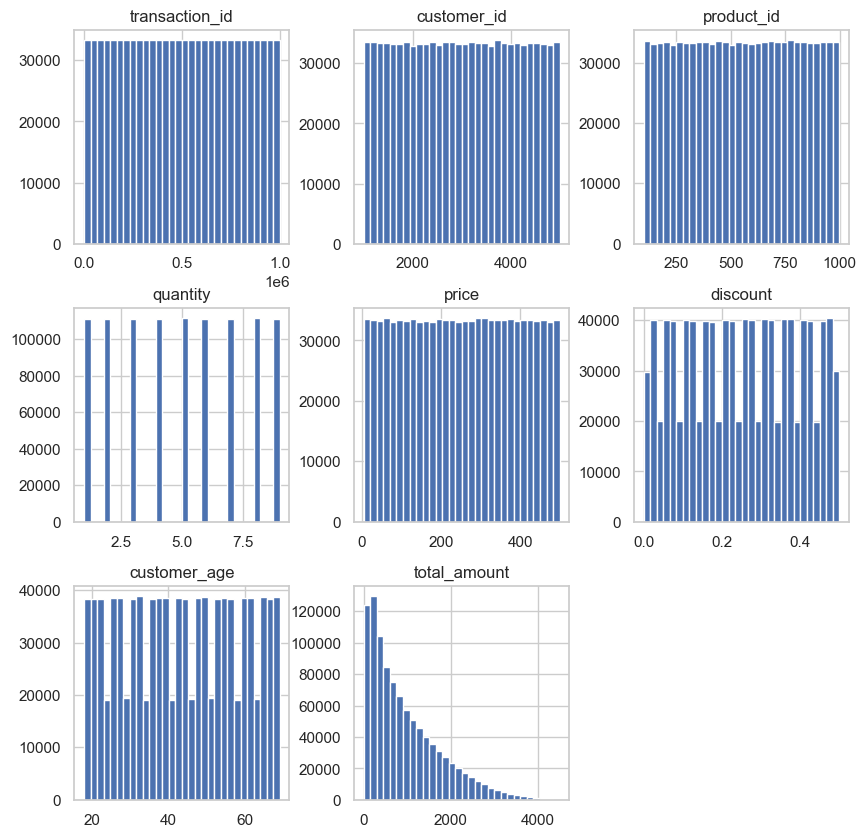

In [19]:
# Histogram for all numerical features
original_df.hist(figsize=(10, 10), bins=30)
plt.title('Distribution of Numerical Features')
plt.show()

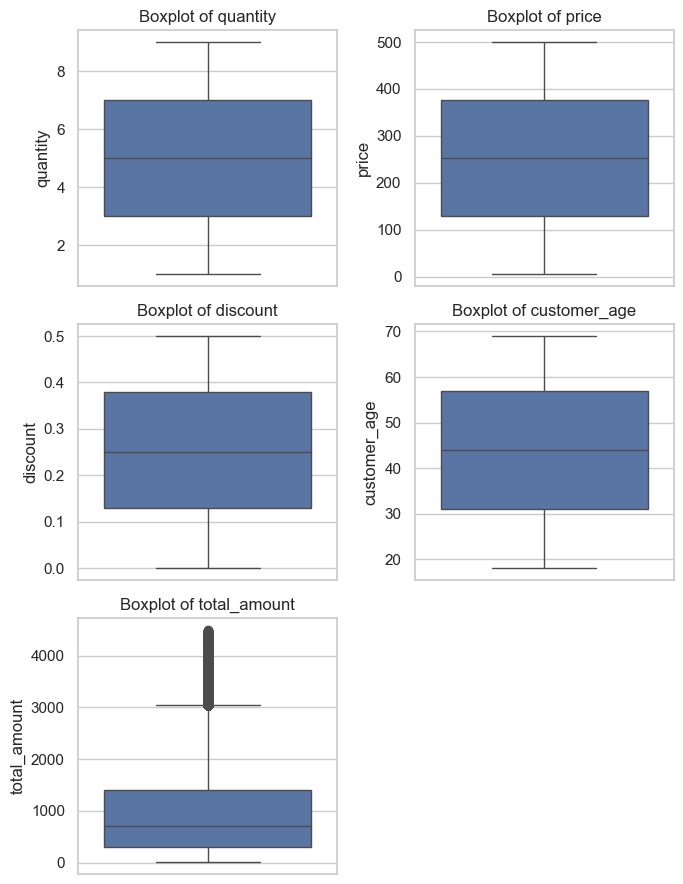

In [20]:
# Boxplot for a specific numerical column
# Set overall figure size for the plots
ncols = 2  # Number of columns
nrows = (len(cols_to_process) + ncols - 1) // ncols  # Calculate rows needed

plt.figure(figsize=(7, nrows * 3))  # Adjust height based on the number of rows

# Create boxplots for each selected column
for i, column in enumerate(cols_to_process):
    plt.subplot(nrows, ncols, i + 1)  # Adjusts the number of rows and columns for subplots
    sns.boxplot(data=original_df, y=column)
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

[In a boxplot, the presence of a black mark at the maximum quantile typically represents the maximum value of the dataset](https://www.statology.org/how-to-read-box-plot-with-outliers/), excluding outliers.​ This mark indicates the highest observation that falls within a defined range, providing insight into the data distribution and helping to visualize its spread. No usually how outliers looks like, but it can be, as it is outside the whiskers of both ends.

### Outlier Detection & Elimination

**Definition of Quartiles**:

- Q1 (First Quartile): This is the 25th percentile of the data, meaning that 25% of the data points are below this value.
- Q3 (Third Quartile): This is the 75th percentile, indicating that 75% of the data points are below this value.

**Calculating IQR**:

- The Interquartile Range (IQR) is calculated as:
```bash
IQR = Q3 - Q1
```

- The IQR represents the range within which the central 50% of the data points lie.

**Identifying Outliers**:

- Outliers are defined as any data points that fall below `Q1 − 1.5 * IQR` or above `Q3 + 1.5 * IQR`.
- Once outliers are identified, they can be removed from the dataset to ensure that subsequent analyses are not skewed by these extreme values.

In [21]:
def count_outliers_iqr(dataframe, columns):
    outlier_counts = {}
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the outliers
        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
        outlier_counts[column] = outliers.shape[0]  # Number of outliers
    
    return outlier_counts

# Count outliers in the specified numeric columns
outlier_counts = count_outliers_iqr(original_df, cols_to_process)

print(outlier_counts)

{'quantity': 0, 'price': 0, 'discount': 0, 'customer_age': 0, 'total_amount': 21985}


In [22]:
def remove_outliers_iqr(df, numeric_columns):
    df_filtered = df.copy()

    # For each numeric column, Q1 and Q3 are calculated using quantile(), and then IQR is computed.
    
    for column in numeric_columns:
        Q1 = df_filtered[column].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df_filtered[column].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        
        # Define bounds for outliers
        # The lower and upper bounds for identifying outliers are established.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        # Rows containing outliers are removed based on these bounds
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    # Cleaned DataFrame without outliers is returned
    return df_filtered

original_df = remove_outliers_iqr(original_df, cols_to_process)

# Caveat: must run this function several times to remove the outlier completely

outlier_counts = count_outliers_iqr(original_df, cols_to_process)

In [23]:
outlier_counts

{'quantity': 0,
 'price': 0,
 'discount': 0,
 'customer_age': 0,
 'total_amount': 6564}

In [24]:
# Updating the DF of numeric columns to process
filtered_numeric_df = original_df[filtered_numeric_columns]

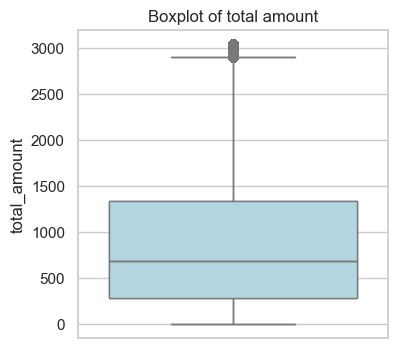

In [25]:
# Boxplot to confirm the removal of outlier
plt.figure(figsize=(4,4))
sns.boxplot(y='total_amount', data=filtered_numeric_df) 
sns.boxplot(y='total_amount', data=filtered_numeric_df, color='lightblue')
plt.title('Boxplot of total amount')
plt.show()

In [26]:
original_df.shape

(978015, 14)

**Rationale**: Outlier management assures the robustness of analyses, as they can detrimentally affect interpretations and model accuracy. Ensure that the dataset has enough data points after removing outliers; if too many rows are removed, consider adjusting the IQR multiplier or using alternative methods like Z-score or robust statistical techniques.

#### Sampling

**Sample Size Considerations**

A sample of `358` is sometimes considered standard due to statistical guidelines that help balance accuracy and practicality.
This number can provide a reasonable assurance of representing the population well while allowing for sufficient power in statistical tests.
Depending on the specific research goals, using a `n=358` can yield very reliable data while still being manageable in scale.
Therefore, our group will choose an `n=1000` for given `N=1000000`.

In [27]:
# Sample size calculation
sampled_df = original_df.sample(n=1000, random_state=42)  # random_state is optional for reproducibility

# Updating the sampled DF of numeric columns of selected columns
filtered_numeric_sampled_df = sampled_df[filtered_numeric_columns]

In [28]:
print("Shape before sampling:", original_df.shape)
print("Shape after sampling:", sampled_df.shape)

Shape before sampling: (978015, 14)
Shape after sampling: (1000, 14)


### Test for Normality

In [29]:
# Shapiro-Wilk
def shapiroWilk(df, columns):
    for col in columns:
        stat, p = shapiro(df[col])
        print(f'Shapiro-Wilk Test for {col}: Statistics={stat}, p-value={p}')
        
        if p > 0.05:
            print(f'{col} looks Gaussian (fail to reject H0)')
        else:
            print(f'{col} does not look Gaussian (reject H0)')

testNormalityShapiro = shapiroWilk(filtered_numeric_sampled_df , cols_to_process)

print(testNormalityShapiro)

Shapiro-Wilk Test for quantity: Statistics=0.9303969904098861, p-value=3.785172710369739e-21
quantity does not look Gaussian (reject H0)
Shapiro-Wilk Test for price: Statistics=0.9539246129894182, p-value=3.594335991776531e-17
price does not look Gaussian (reject H0)
Shapiro-Wilk Test for discount: Statistics=0.9530506565158168, p-value=2.4220160448741e-17
discount does not look Gaussian (reject H0)
Shapiro-Wilk Test for customer_age: Statistics=0.9547563614837385, p-value=5.259469854930314e-17
customer_age does not look Gaussian (reject H0)
Shapiro-Wilk Test for total_amount: Statistics=0.900944478681482, p-value=6.606519559258091e-25
total_amount does not look Gaussian (reject H0)
None


In [30]:
results = {}
def dagostino(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        stat, p_value = normaltest(df[column])
        results[column] = {'Test Statistic': stat, 'p-value': p_value}
    
    # Display the results
    for column, result in results.items():
        print(f"Column: {column}")
        print(f"Test Statistic: {result['Test Statistic']}")
        print(f"p-value: {result['p-value']}\n")

testDA = dagostino(filtered_numeric_sampled_df)

# test Statistic: This high value suggests a significant deviation from normality.
# p-value: This extremely low p-value indicates that the null hypothesis can be rejected with high confidence.

Column: quantity
Test Statistic: 1125.906007816579
p-value: 3.2554934940752717e-245

Column: price
Test Statistic: 756.2837163089632
p-value: 5.957686231651231e-165

Column: discount
Test Statistic: 754.7375507670986
p-value: 1.2906937538211695e-164

Column: customer_age
Test Statistic: 662.5704599890491
p-value: 1.3324553880606773e-144

Column: total_amount
Test Statistic: 110.25608255220708
p-value: 1.1433939124469278e-24



#### Visualizing Non-Normality

**Q-Q Plot**: It compares data to a theoretical distribution (e.g., normal distribution). Deviations from the straight line indicate non-normality.

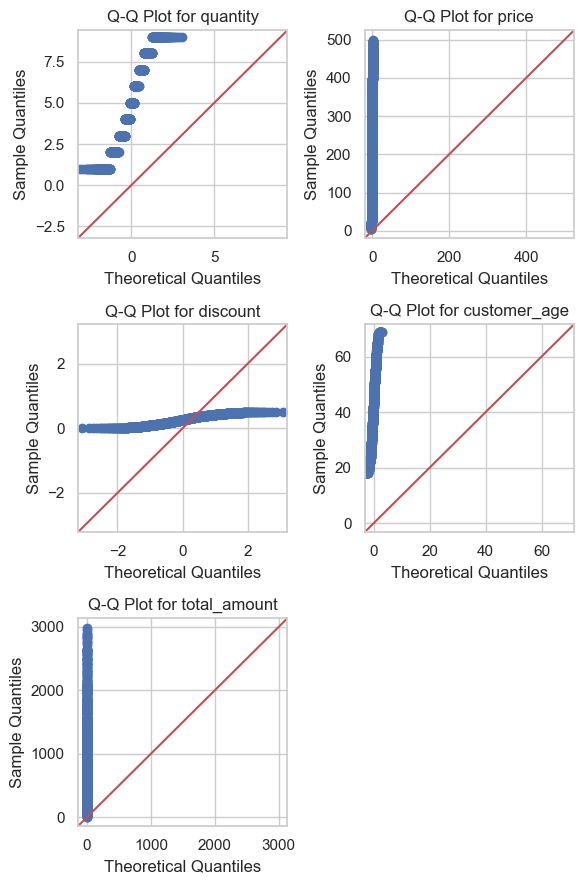

None


In [31]:
def qqplot(df):
    variables = df.columns
    # Calculate the number of rows needed
    n_vars = len(variables)
    n_cols = 2
    n_rows = (n_vars + n_cols - 1) // n_cols

    # Create a figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6, n_rows * 3))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot Q-Q plots for each variable
    for i, var in enumerate(variables):
        sm.qqplot(filtered_numeric_sampled_df[var], line='45', ax=axes[i])
        axes[i].set_title(f'Q-Q Plot for {var}')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

print(qqplot(filtered_numeric_sampled_df))

### Data Transformation

Several methods(log, square-root, Box-Cox) can be applied to transform non-Gaussian data into a more normal-like distribution. But we used the `Yeo-Johnson Transformation` which imilar to Box-Cox but but can handle zero and negative values. It offers numerous benefits that enhances the efficiency and accuracy of data cleaning processes. Its ability to normalize data distributions, handle varied data types, improve model outcomes, and provide clarity in interpretation makes it an invaluable technique in the field of data analysis.

In [32]:
# Instantiate the Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Transform the selected numeric columns
sampled_df[cols_to_process] = pt.fit_transform(sampled_df[cols_to_process])

sampled_df.head()

,transaction_id,timestamp,customer_id,product_id,product_category,quantity,price,discount,payment_method,customer_age,customer_gender,customer_location,total_amount,date
733611,733612,2024-05-24T10:51:00,1608,526,home & kitchen,-1.164466,-0.106108,1.557833,credit card,-1.326213,male,north america,-0.943953,2024-05-24
173507,173508,2023-05-01T11:47:00,1503,779,electronics,-0.706795,-0.329752,1.412145,debit card,-0.446789,other,australia,-0.731129,2023-05-01
57897,57898,2023-02-10T04:57:00,1184,412,books,-1.164466,1.307740,-1.760883,credit card,0.732059,male,north america,0.341612,2023-02-10
50093,50094,2023-02-04T18:53:00,1311,379,beauty & personal care,-0.287904,-0.984632,-0.080464,gift card,-1.248910,other,europe,-0.729742,2023-02-04
410505,410506,2023-10-13T01:45:00,1203,280,beauty & personal care,1.155868,0.047199,-0.425358,credit card,0.224324,female,asia,0.968467,2023-10-13


In [33]:
testNormalityShapiro1 = shapiroWilk(sampled_df , cols_to_process)

print(testNormalityShapiro1)

Shapiro-Wilk Test for quantity: Statistics=0.9321370705899507, p-value=6.840705868420201e-21
quantity does not look Gaussian (reject H0)
Shapiro-Wilk Test for price: Statistics=0.9599689673804322, p-value=6.444868876822875e-16
price does not look Gaussian (reject H0)
Shapiro-Wilk Test for discount: Statistics=0.95346709801894, p-value=2.921347558140293e-17
discount does not look Gaussian (reject H0)
Shapiro-Wilk Test for customer_age: Statistics=0.9553089771919747, p-value=6.791718790330217e-17
customer_age does not look Gaussian (reject H0)
Shapiro-Wilk Test for total_amount: Statistics=0.9853656606183644, p-value=1.8598871268433825e-08
total_amount does not look Gaussian (reject H0)
None


**Rationale**: Yeo-Johnson transformation can assist in making your data follows a normal distribution. This transformation is particularly useful because it can handle both positive and negative values, unlike the Box-Cox transformation which only works with positive values.
The Yeo-Johnson transformation works by applying a power transformation to the data, which can stabilize variance and make the data more Gaussian-like. However, it’s important to note that the effectiveness of the transformation can vary depending on the original distribution of your data. Visualizing data before and after the transformation can help you assess its impact.

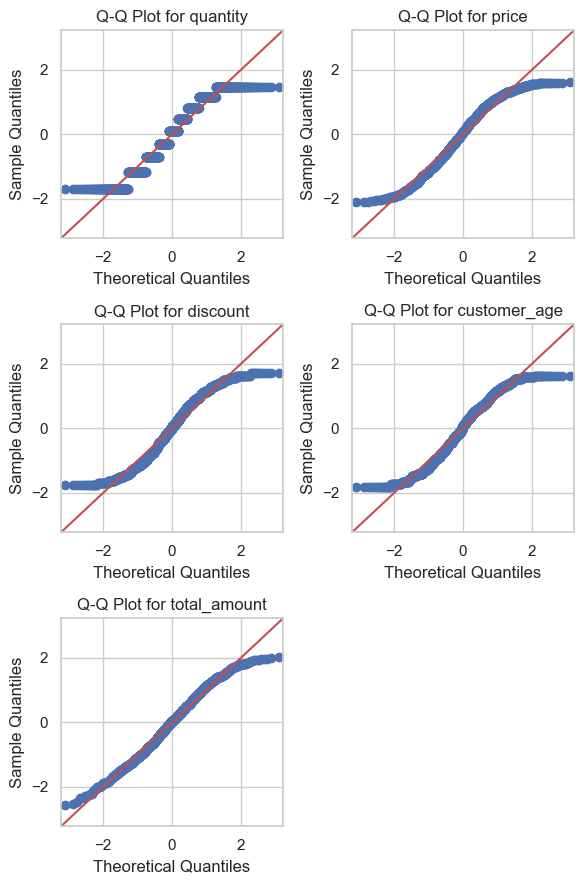

In [34]:
def qqplot(df):
    variables = df.columns
    # Calculate the number of rows needed
    n_vars = len(variables)
    n_cols = 2
    n_rows = (n_vars + n_cols - 1) // n_cols

    # Create a figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6, n_rows * 3))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot Q-Q plots for each variable
    for i, var in enumerate(variables):
        sm.qqplot(df[var], line='45', ax=axes[i])
        axes[i].set_title(f'Q-Q Plot for {var}')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

qqplot(sampled_df[cols_to_process])

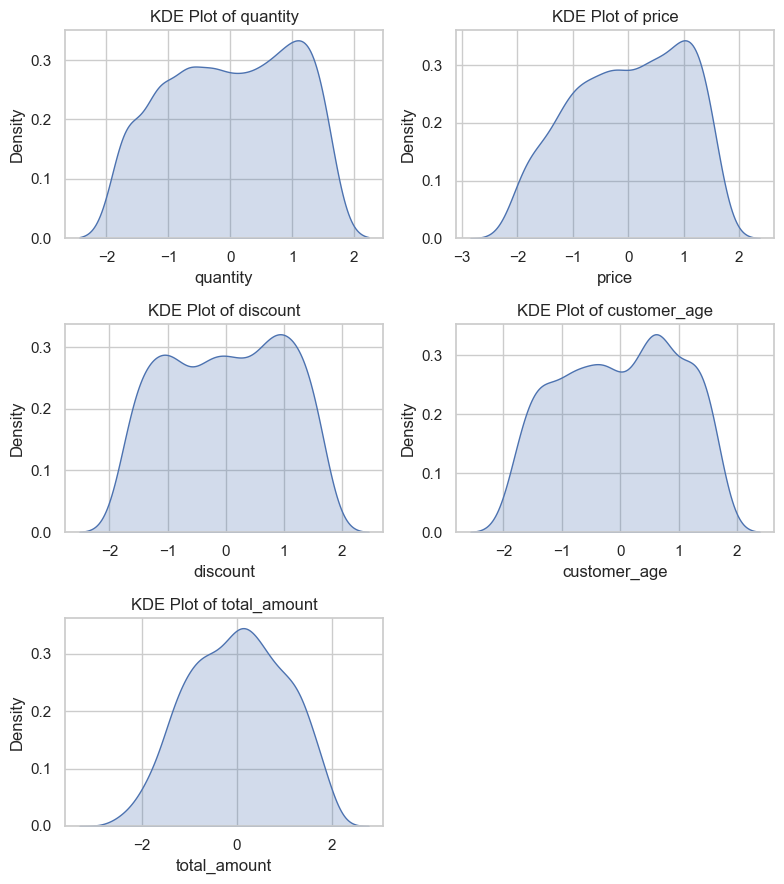

In [35]:
def histoplot(df):
    numeric_cols = df.columns
    num_plots = len(numeric_cols)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, num_rows * 3))

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Plot KDE for each numeric column
    for i, col in enumerate(numeric_cols):
        sns.kdeplot(df[col], ax=axes[i], fill=True)
        axes[i].set_title(f'KDE Plot of {col}')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        plt.tight_layout()
        plt.show()

histoplot(sampled_df[cols_to_process])

### Data Preprocessing

**Standardization**, also known as Z-score normalization, involves rescaling the data such that it has a mean **(μ) of 0** and a standard deviation **(σ) of 1**.

This transformation allows the data to be centered around zero, which is particularly useful for algorithms that assume normal distribution or rely on distance metrics. Standardization, is beneficial in scenarios where the dataset contains features with different units or scales.

**Normalization**, often referred to as Min-Max scaling, rescales the features to a specific range, typically **[0, 1]**. In this method, the minimum and maximum values in the dataset are used to ensure that all features contribute equally to the computation.

One key difference between these two techniques is their sensitivity to outliers. Standardization is less affected by outliers since it centers the data based on the mean and standard deviation. Normalization, however, can be significantly influenced by extreme values, as it directly uses the minimum and maximum values of the dataset, which can result in skewed scales.

In [36]:
# Normalizing numerical columns
scaler = MinMaxScaler()
sampled_df[cols_to_process] = scaler.fit_transform(sampled_df[cols_to_process])

# Display the normalized DataFrame
sampled_df.head()

,transaction_id,timestamp,customer_id,product_id,product_category,quantity,price,discount,payment_method,customer_age,customer_gender,customer_location,total_amount,date
733611,733612,2024-05-24T10:51:00,1608,526,home & kitchen,0.163266,0.535545,0.957784,credit card,0.140726,male,north america,0.353338,2024-05-24
173507,173508,2023-05-01T11:47:00,1503,779,electronics,0.308177,0.475206,0.915738,debit card,0.396267,other,australia,0.399870,2023-05-01
57897,57898,2023-02-10T04:57:00,1184,412,books,0.163266,0.917002,0.000000,credit card,0.738814,male,north america,0.634419,2023-02-10
50093,50094,2023-02-04T18:53:00,1311,379,beauty & personal care,0.440810,0.298519,0.484970,gift card,0.163188,other,europe,0.400173,2023-02-04
410505,410506,2023-10-13T01:45:00,1203,280,beauty & personal care,0.897948,0.576907,0.385434,credit card,0.591277,female,asia,0.771477,2023-10-13


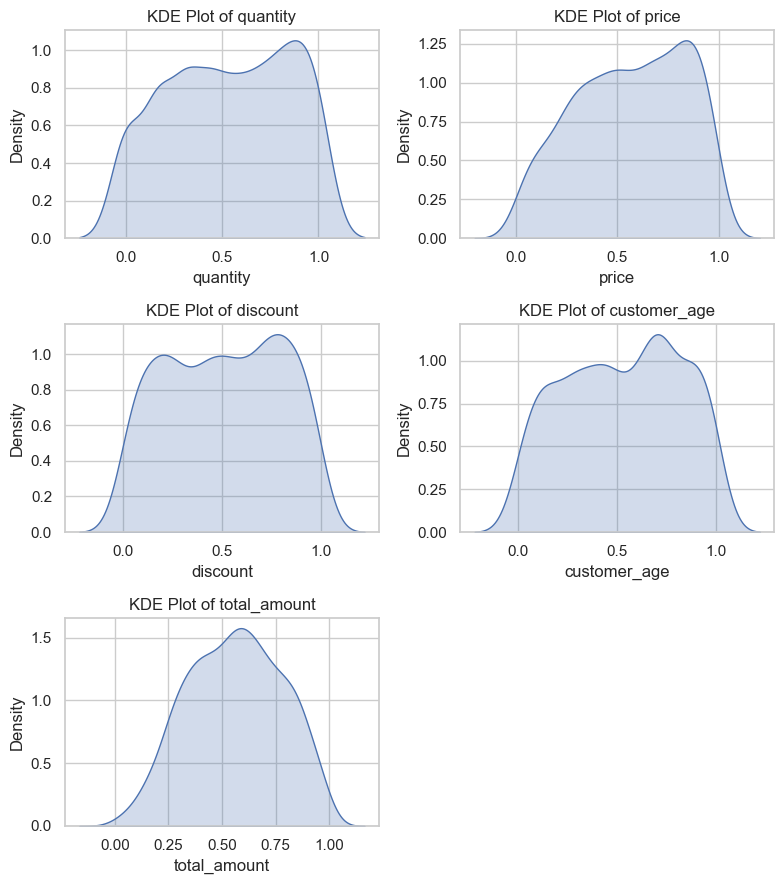

In [37]:
histoplot(sampled_df[cols_to_process])

Scaling data through techniques such as Standardization and Normalization is essential for various data cleaning and preparation tasks, even outside the realm of machine learning.​ These processes ensure that features are on a similar scale, which facilitates meaningful comparisons and reduces distortion in data analysis by preventing features with larger ranges from dominating those with smaller ranges. This normalization of values aids in improving interpretability by allowing patterns and relationships between variables to be more easily recognized. Additionally, scaling helps manage outlier effects and prepares data for more accurate statistical analyses, making it an indispensable step in data handling across various analytical contexts. Properly scaled data not only enhances overall data quality but also ensures that insights derived from analyses are reliable and valid.

In [38]:
sampled_df.shape

(1000, 14)

### EDA

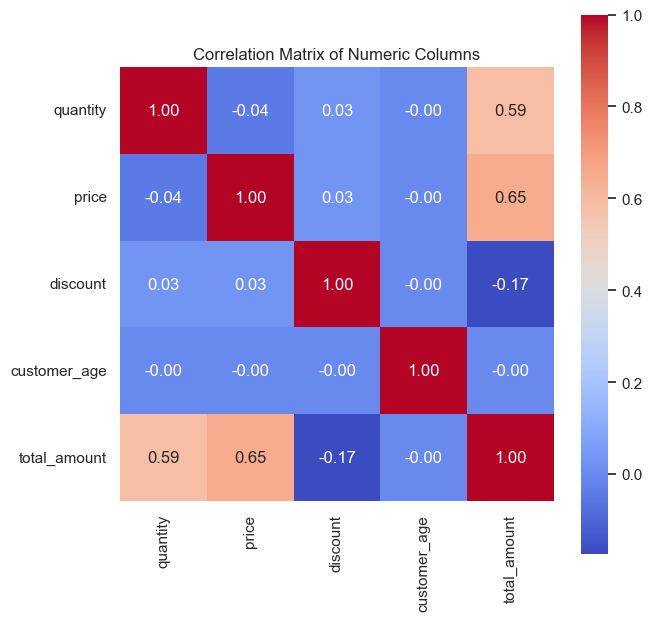

In [39]:
# Selecting numeric columns for correlation analysis
correlation_matrix = original_df[cols_to_process].corr()

# Plotting the correlation matrix
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

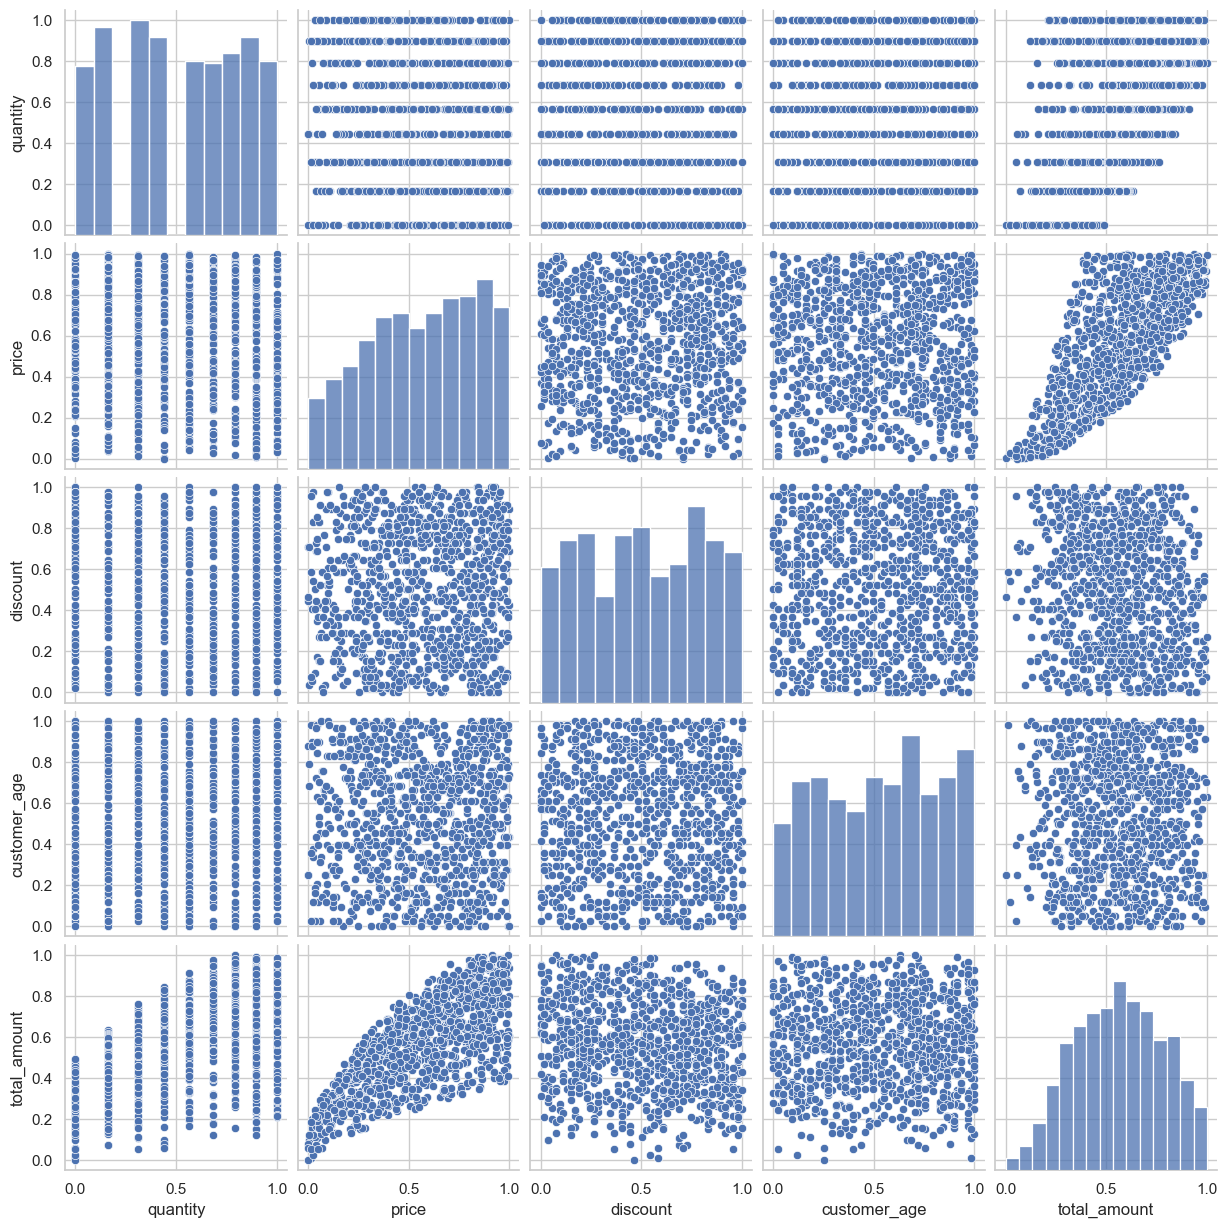

In [40]:
sns.pairplot(sampled_df[cols_to_process])
plt.show()

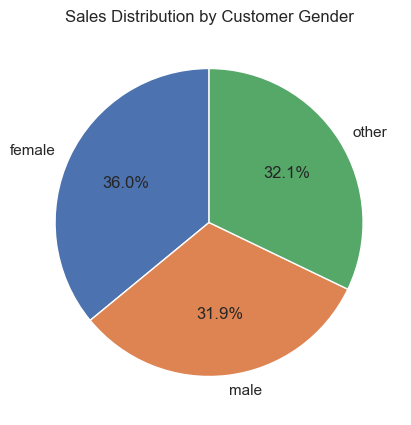

In [41]:
# Total sales by customer gender
gender_sales = sampled_df.groupby('customer_gender')['total_amount'].sum()

# Plotting sales by customer gender
plt.figure(figsize=(8, 5))
gender_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Customer Gender')
plt.ylabel('')
plt.show()

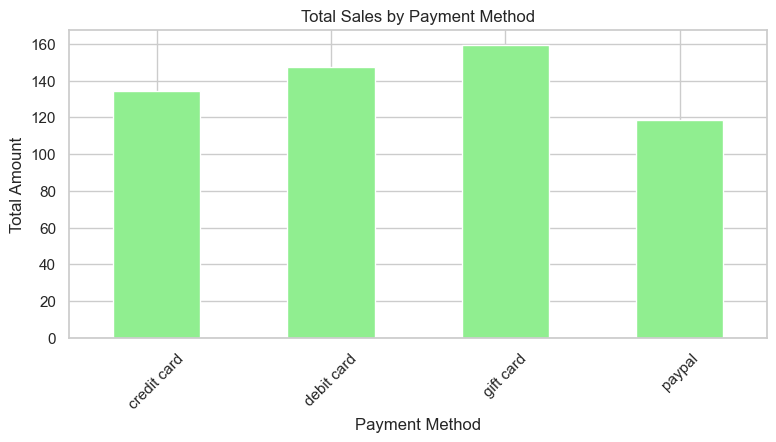

In [42]:
# Total sales by payment method
payment_sales = sampled_df.groupby('payment_method')['total_amount'].sum()

# Plotting payment method contributions
plt.figure(figsize=(9, 4))
payment_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

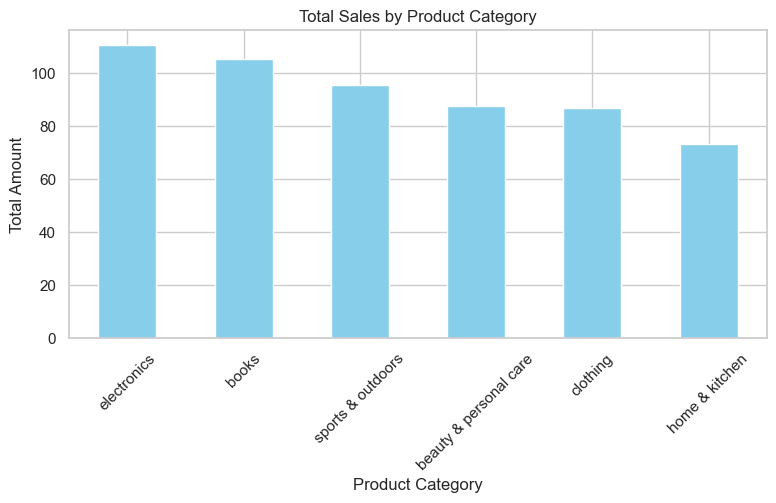

In [43]:
# Total sales by product category
category_sales = sampled_df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)

# Plotting sales by product category
plt.figure(figsize=(9, 4))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

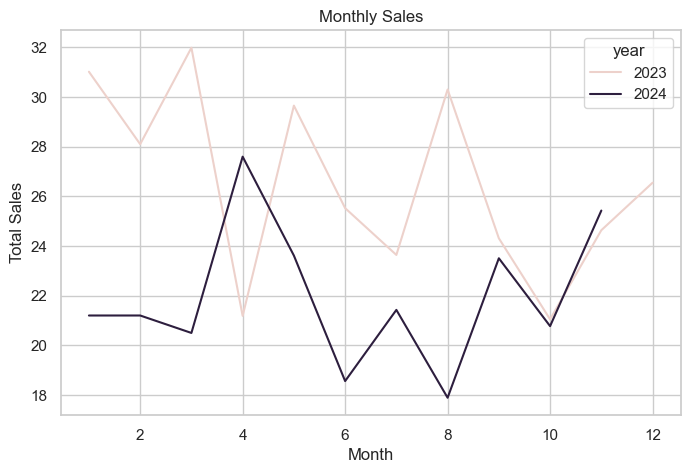

In [44]:
# Convert 'timestamp' to datetime format
sampled_df['timestamp'] = pd.to_datetime(sampled_df['timestamp'])

# Extract year and month from timestamp
sampled_df['year'] = sampled_df['timestamp'].dt.year
sampled_df['month'] = sampled_df['timestamp'].dt.month


# Group the data by month and year, and calculate the total sales
monthly_sales = sampled_df.groupby(['year', 'month'])['total_amount'].sum().reset_index()

# Plot the monthly sales
plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_sales, x='month', y='total_amount', hue='year')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [45]:
# Categorical analysis
# Calculate the total sales for each product category
category_sales = sampled_df.groupby('product_category')['total_amount'].sum().reset_index()
print(category_sales)

         product_category  total_amount
0  beauty & personal care     87.738504
1                   books    105.468177
2                clothing     86.985013
3             electronics    110.818023
4          home & kitchen     73.133701
5       sports & outdoors     95.583973


In [46]:
# Calculate the average price for each product category
category_avg_price = sampled_df.groupby('product_category')['price'].mean().reset_index()
print(category_avg_price)

         product_category     price
0  beauty & personal care  0.534022
1                   books  0.562466
2                clothing  0.599159
3             electronics  0.576919
4          home & kitchen  0.532673
5       sports & outdoors  0.575056


In [47]:
# Calculate the average discount for each product category
category_avg_discount = sampled_df.groupby('product_category')['discount'].mean().reset_index()
print(category_avg_discount)

         product_category  discount
0  beauty & personal care  0.542837
1                   books  0.484534
2                clothing  0.516265
3             electronics  0.502290
4          home & kitchen  0.483196
5       sports & outdoors  0.520893


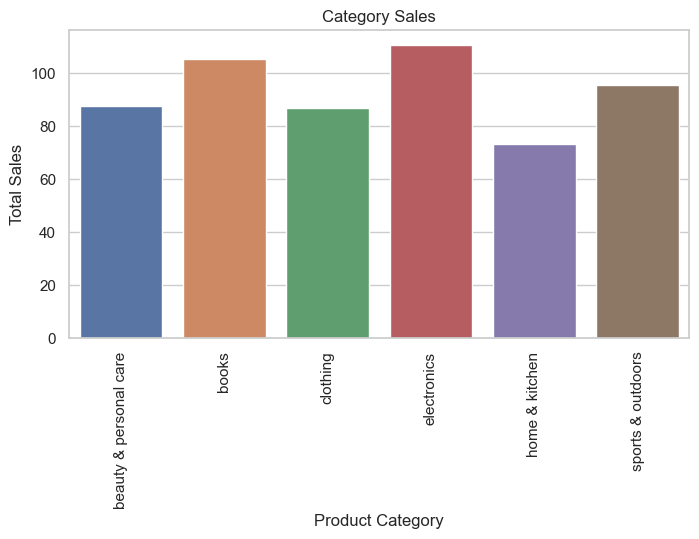

In [48]:
plt.figure(figsize=(8,4))
sns.barplot(data=category_sales, x='product_category', y='total_amount', hue='product_category')
plt.title('Category Sales')
plt.xlabel('Product Category')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.show()

In [49]:
# Transformed and Normalized Numeric Columns
print("Descriptive Statistics of the Transformed and Normalized Columns:")
# print(sampled_df[['quantity', 'price', 'discount', 'customer_age', 'total_amount']].describe())
sampled_df[cols_to_process].describe()

Descriptive Statistics of the Transformed and Normalized Columns:


,quantity,price,discount,customer_age,total_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.531968,0.564173,0.508192,0.526094,0.559727
std,0.316786,0.269936,0.288745,0.290723,0.218754
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.308177,0.350298,0.248161,0.272045,0.393451
50%,0.564413,0.585790,0.525122,0.534140,0.567339
75%,0.791842,0.802032,0.769943,0.756810,0.731229
max,1.000000,1.000000,1.000000,1.000000,1.000000


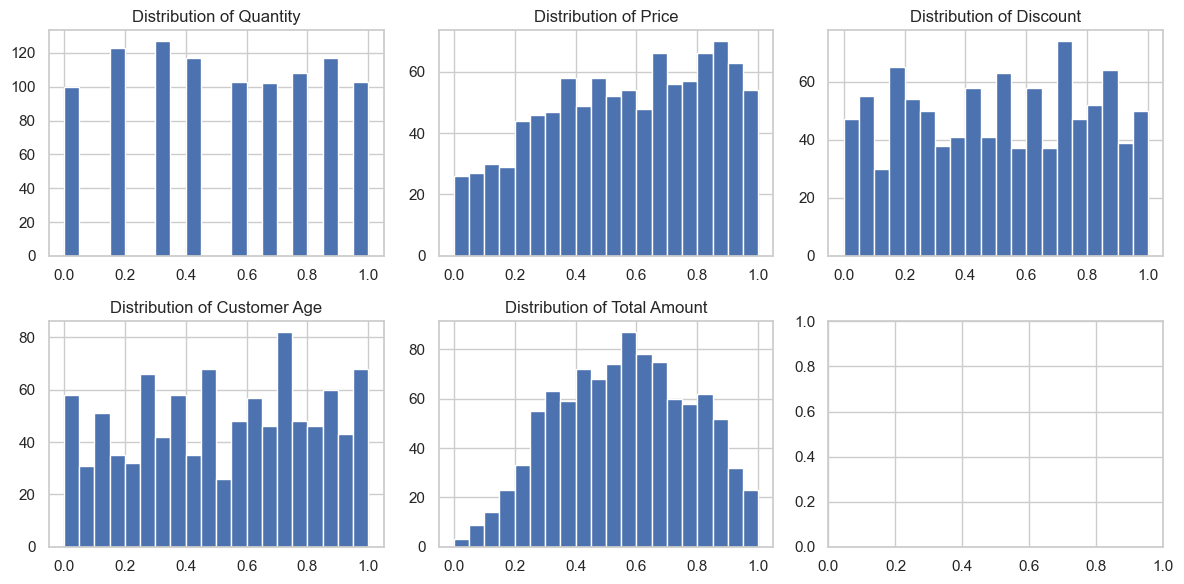

In [50]:
# Visualize the distributions of the transformed and normalized columns
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

axes[0, 0].hist(sampled_df['quantity'], bins=20)
axes[0, 0].set_title('Distribution of Quantity')

axes[0, 1].hist(sampled_df['price'], bins=20)
axes[0, 1].set_title('Distribution of Price')

axes[0, 2].hist(sampled_df['discount'], bins=20)
axes[0, 2].set_title('Distribution of Discount')

axes[1, 0].hist(sampled_df['customer_age'], bins=20)
axes[1, 0].set_title('Distribution of Customer Age')

axes[1, 1].hist(sampled_df['total_amount'], bins=20)
axes[1, 1].set_title('Distribution of Total Amount')

plt.tight_layout()
plt.show()

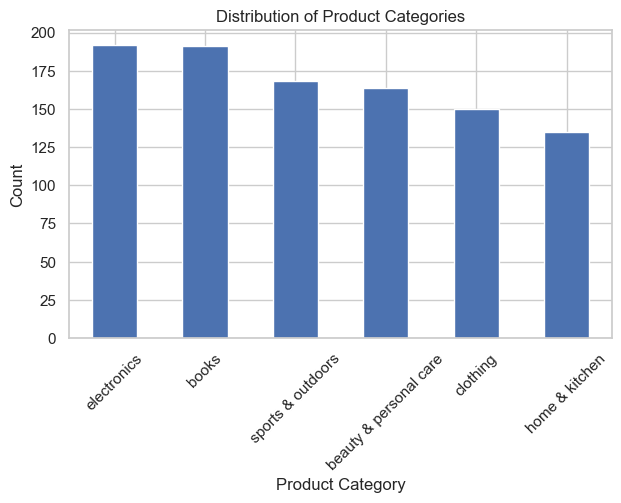

payment_method
gift card      279
debit card     261
credit card    238
paypal         222
Name: count, dtype: int64


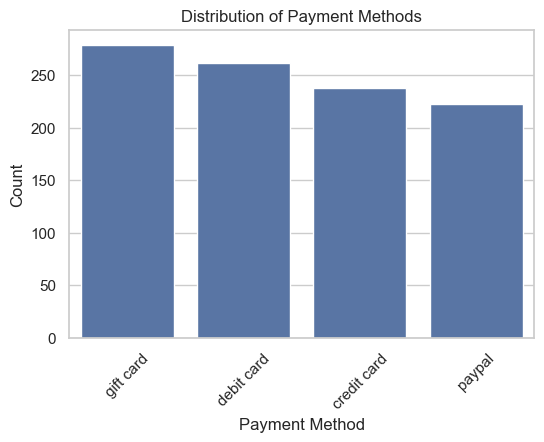

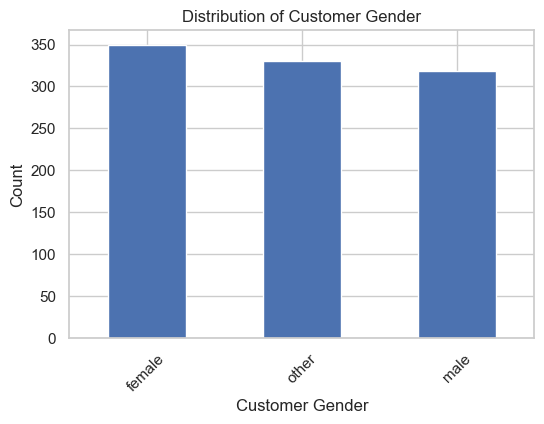

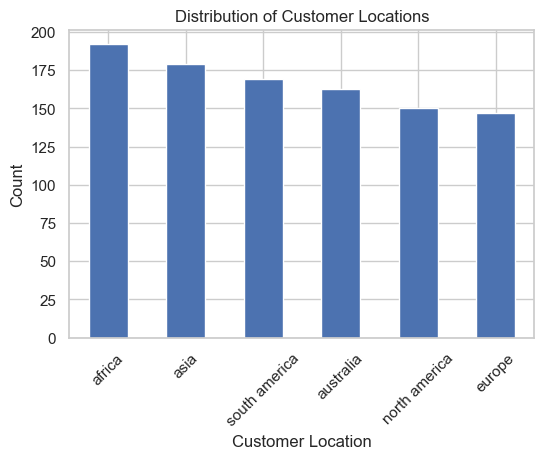

In [51]:
# 2. Explore the Categorical Columns
# Analyze the distribution of product categories
payment_counts = sampled_df['payment_method'].value_counts()

plt.figure(figsize=(7, 4))
sampled_df['product_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

# Analyze the distribution of payment methods
print(payment_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='payment_method', data=sampled_df, order=payment_counts.index)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analyze the distribution of customer gender
plt.figure(figsize=(6, 4))
sampled_df['customer_gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analyze the distribution of customer location
plt.figure(figsize=(6, 4))
sampled_df['customer_location'].value_counts().plot(kind='bar')
plt.title('Distribution of Customer Locations')
plt.xlabel('Customer Location')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

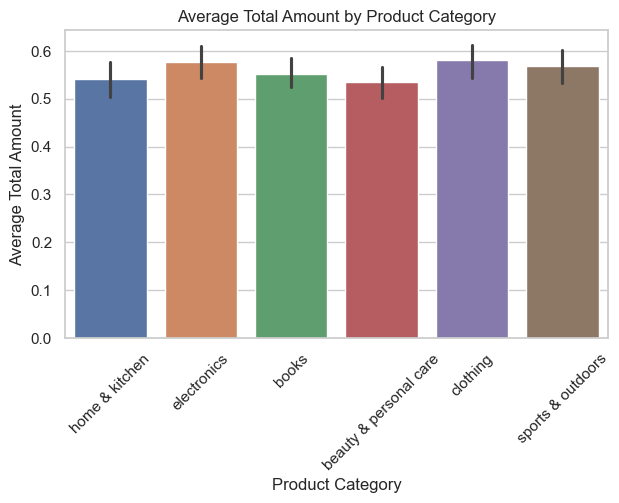

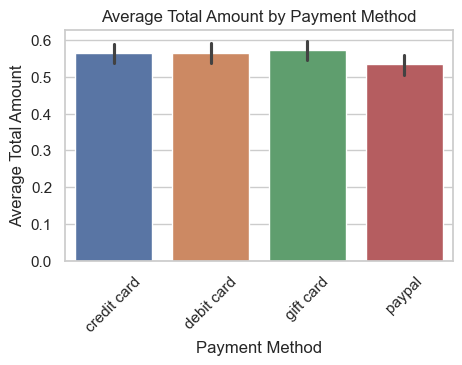

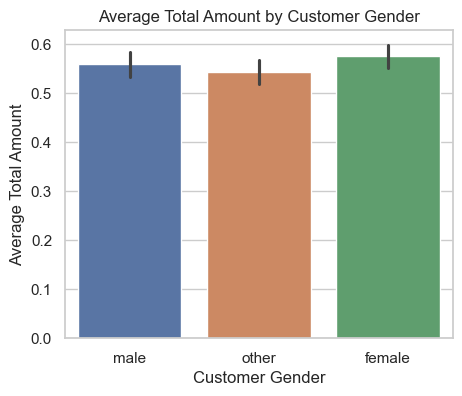

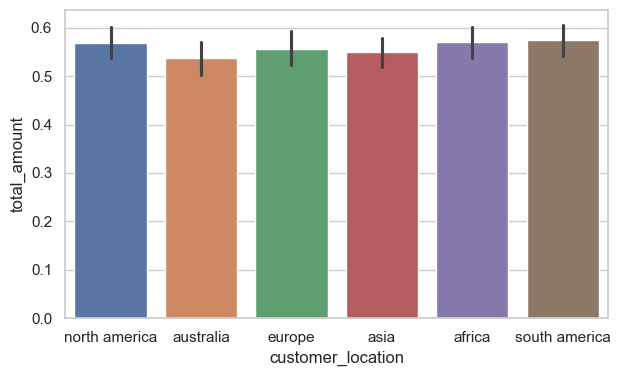

In [52]:
# 3. Explore Relationships between Transformed Numeric and Categorical Columns
# Analyze the relationship between product category and total amount
plt.figure(figsize=(7, 4))
sns.barplot(x='product_category', y='total_amount', data=sampled_df, hue='product_category')
plt.title('Average Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Total Amount')
plt.xticks(rotation=45)
plt.show()

# Analyze the relationship between payment method and total amount
plt.figure(figsize=(5, 3))
sns.barplot(x='payment_method', y='total_amount', data=sampled_df, hue='payment_method')
plt.title('Average Total Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Total Amount')
plt.xticks(rotation=45)
plt.show()

# Analyze the relationship between customer gender and total amount
plt.figure(figsize=(5, 4))
sns.barplot(x='customer_gender', y='total_amount', data=sampled_df, hue="customer_gender")
plt.title('Average Total Amount by Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Average Total Amount')
plt.show()

# Analyze the relationship between customer location and total amount
plt.figure(figsize=(7, 4))
sns.barplot(x='customer_location', y='total_amount', data=sampled_df, hue='customer_location')
plt.title
plt.show()

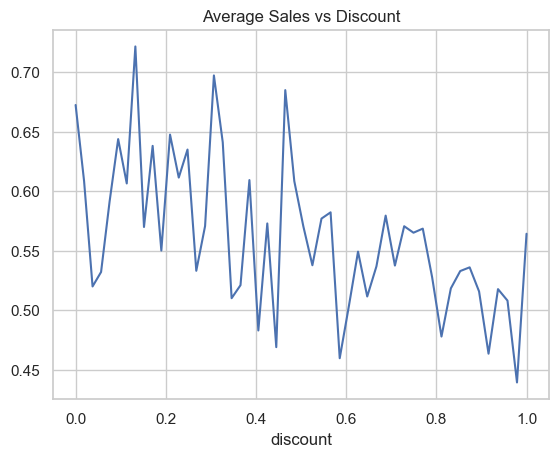

In [53]:
# Discount Impact: How discount affect sales
discount_effect = sampled_df.groupby('discount')['total_amount'].mean()
discount_effect.plot(title='Average Sales vs Discount')
plt.show()

payment_method
gift card      279
debit card     261
credit card    238
paypal         222
Name: count, dtype: int64


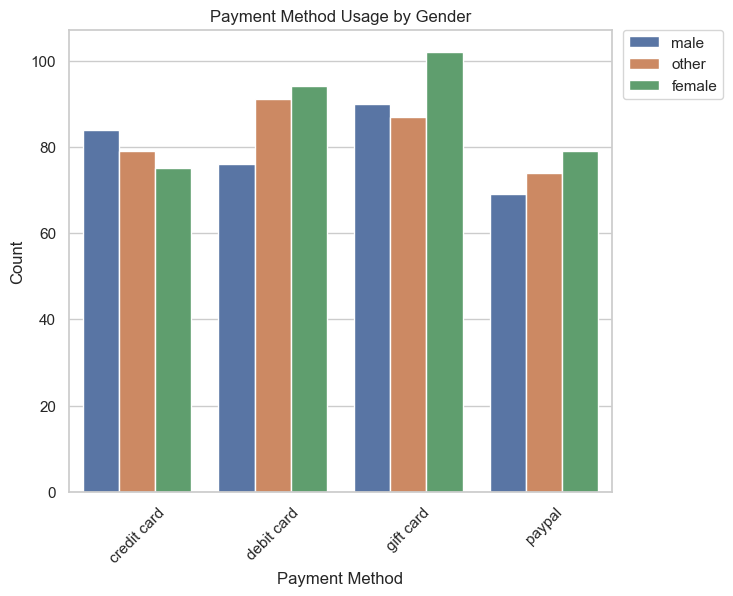

In [54]:
# Payment Analysis Concentration
# Payment Method Analysis: Understand which payment methods are preferred by customers.
# Customer Demographics by Payment Method
# Analyze how different payment methods are used across different customer segments gender

# Count of payment methods used by gender
print(payment_counts)
plt.figure(figsize=(7, 6))
sns.countplot(x='payment_method', hue='customer_gender', data=sampled_df)
plt.title('Payment Method Usage by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

  payment_method  total_amount
0    credit card    134.098446
1     debit card    147.504675
2      gift card    159.639490
3         paypal    118.484780


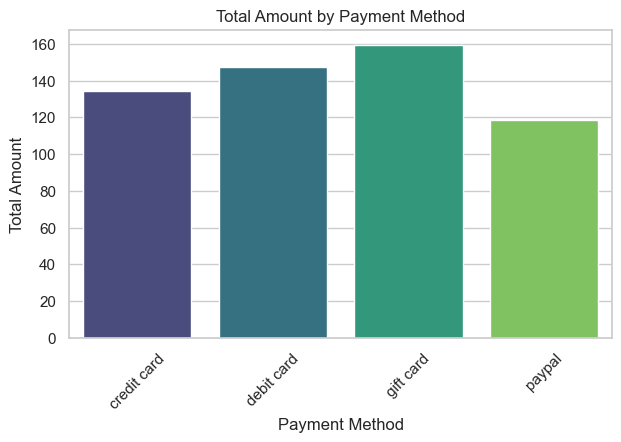

In [55]:
# Analyze Total Amount by Payment Method: Analyze the total sales amount for each payment method

total_amount_by_payment = sampled_df.groupby('payment_method')['total_amount'].sum().reset_index()
print(total_amount_by_payment)

# Visualize total amount by payment method
plt.figure(figsize=(7, 4))
sns.barplot(x='payment_method', y='total_amount', data=total_amount_by_payment, palette='viridis', hue='payment_method')
plt.title('Total Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

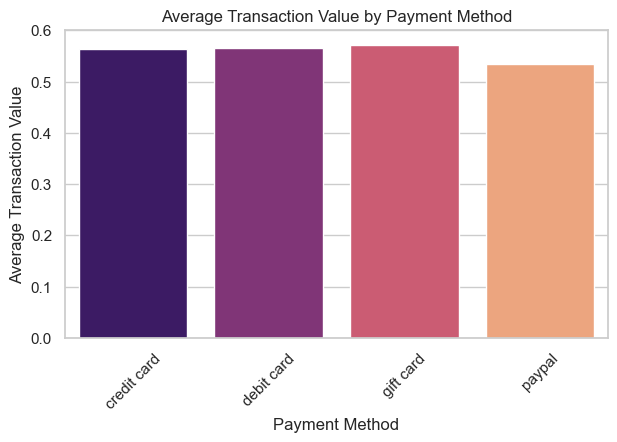

In [56]:
# Calculate and visualize the average transaction value for each payment method
# Average Transaction Value by Payment Method

avg_transaction_value = sampled_df.groupby('payment_method')['total_amount'].mean().reset_index()

# Visualize average transaction value by payment method
plt.figure(figsize=(7, 4))
sns.barplot(x='payment_method', y='total_amount', data=avg_transaction_value, palette='magma', hue='payment_method')
plt.title('Average Transaction Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Transaction Value')
plt.xticks(rotation=45)
plt.show()